In [30]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.6f}".format)

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pyarrow.parquet as pq

path = "/content/drive/MyDrive/TwiBot-22_Processed"

enriched_user_features = pd.read_parquet(f"{path}/enriched_user_features.parquet", engine='pyarrow')

In [5]:
n_rows, n_columns = enriched_user_features.shape
print(f"The dataset contains {n_rows} rows and {n_columns} columns.")

The dataset contains 314813 rows and 52 columns.


In [6]:
enriched_user_features.head(2)

,id,name_length,username_length,username_name_length_ratio,description,description_length,has_name,has_username,has_description,has_url,has_location,has_pinned_tweet,has_bot_word_in_name,has_bot_word_in_description,ratio_digits_in_name,ratio_digits_in_username,ratio_digits_in_description,ratio_special_chars_in_name,ratio_special_chars_in_username,ratio_special_chars_in_description,name_upper_to_lower_ratio,username_upper_to_lower_ratio,name_entropy,username_entropy,username_name_levenshtein,description_sentiment,cashtag_in_description_count,hashtag_in_description_count,mention_in_description_count,url_in_description_count,is_protected,is_verified,account_age_seconds,followers_over_following,double_followers_over_following,following_over_followers,following_over_followers_squared,following_over_total_connections,listed_over_followers,tweets_over_followers,listed_over_tweets,follower_rate,following_rate,listed_rate,tweet_rate,label,tweets_last20_concatenated_text,tweets_last20_reply_fraction,tweets_last20_num_distinct_langs,tweets_last20_sensitive_fraction,tweets_last20_avg_likes,tweets_last20_avg_retweets
0,u1000115670657318912,4,6,1.500000,Open source tool for data & models versioning ...,145,True,True,True,False,True,True,False,False,0.0,0.0,0.013793,0.250000,0.0,0.062069,3.0,1.0,2.000000,2.584963,0.666667,0.765,0,0,0,1,False,False,231330941,10.732308,21.464615,0.093177,0.000027,0.085235,0.022649,0.261181,0.086718,0.000015,0.000001,3.415021e-07,0.000004,human,RT <USER>: 5 open-source frameworks for MLOps:...,0.05,1,0.0,4.5,7.2
1,u1000144495499993089,17,13,0.764706,SOVRANITÀ 🖤 🇮🇹 \nOgni volta che decidi perdi q...,142,True,True,True,False,True,True,False,False,0.0,0.0,0.000000,0.823529,0.0,0.077465,0.0,0.0,3.690116,2.777363,1.000000,0.000,0,0,0,0,False,False,231324068,1.990989,3.981979,0.502263,0.000043,0.334338,0.001025,8.683716,0.000118,0.000051,0.000025,5.187528e-08,0.000440,human,Tutto sta ancora in piedi perché c'è ancora ta...,0.45,1,0.0,13.8,66.5


In [7]:
# Check for missing values
if enriched_user_features.isnull().any().any():
    print("Missing values found in the dataset.")
    na_summary = enriched_user_features.isnull().sum().loc[lambda x: x > 0].to_frame(name='Missing Count')
    na_summary['Missing Percentage'] = (na_summary['Missing Count'] / enriched_user_features.shape[0]) * 100
    print("\nSummary of missing values:")
    print(na_summary)
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [8]:
# Check and handle duplicate rows
duplicates = enriched_user_features.duplicated().sum()
if duplicates > 0:
    print(f"Warning: The dataset contains {duplicates} duplicate rows.")
    enriched_user_features = enriched_user_features.drop_duplicates()
    print(f"\n{duplicates} duplicate rows have been dropped. The dataset now has {enriched_user_features.shape[0]} rows.")
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


In [9]:
# Cast label column: 1 if "bot", 0 if "human"
enriched_user_features['label'] = enriched_user_features['label'].map({'human': 0, 'bot': 1})

In [10]:
enriched_user_features.head(2)

,id,name_length,username_length,username_name_length_ratio,description,description_length,has_name,has_username,has_description,has_url,has_location,has_pinned_tweet,has_bot_word_in_name,has_bot_word_in_description,ratio_digits_in_name,ratio_digits_in_username,ratio_digits_in_description,ratio_special_chars_in_name,ratio_special_chars_in_username,ratio_special_chars_in_description,name_upper_to_lower_ratio,username_upper_to_lower_ratio,name_entropy,username_entropy,username_name_levenshtein,description_sentiment,cashtag_in_description_count,hashtag_in_description_count,mention_in_description_count,url_in_description_count,is_protected,is_verified,account_age_seconds,followers_over_following,double_followers_over_following,following_over_followers,following_over_followers_squared,following_over_total_connections,listed_over_followers,tweets_over_followers,listed_over_tweets,follower_rate,following_rate,listed_rate,tweet_rate,label,tweets_last20_concatenated_text,tweets_last20_reply_fraction,tweets_last20_num_distinct_langs,tweets_last20_sensitive_fraction,tweets_last20_avg_likes,tweets_last20_avg_retweets
0,u1000115670657318912,4,6,1.500000,Open source tool for data & models versioning ...,145,True,True,True,False,True,True,False,False,0.0,0.0,0.013793,0.250000,0.0,0.062069,3.0,1.0,2.000000,2.584963,0.666667,0.765,0,0,0,1,False,False,231330941,10.732308,21.464615,0.093177,0.000027,0.085235,0.022649,0.261181,0.086718,0.000015,0.000001,3.415021e-07,0.000004,0,RT <USER>: 5 open-source frameworks for MLOps:...,0.05,1,0.0,4.5,7.2
1,u1000144495499993089,17,13,0.764706,SOVRANITÀ 🖤 🇮🇹 \nOgni volta che decidi perdi q...,142,True,True,True,False,True,True,False,False,0.0,0.0,0.000000,0.823529,0.0,0.077465,0.0,0.0,3.690116,2.777363,1.000000,0.000,0,0,0,0,False,False,231324068,1.990989,3.981979,0.502263,0.000043,0.334338,0.001025,8.683716,0.000118,0.000051,0.000025,5.187528e-08,0.000440,0,Tutto sta ancora in piedi perché c'è ancora ta...,0.45,1,0.0,13.8,66.5


In [11]:
# Count human and bot accounts
human_count = (enriched_user_features['label'] == 0).sum()
bot_count = n_rows - human_count

human_pct = human_count / n_rows * 100
bot_pct = bot_count / n_rows * 100

print(f"Number of human accounts: {human_count} ({human_pct:.2f}%)")
print(f"Number of bot accounts: {bot_count} ({bot_pct:.2f}%)")

Number of human accounts: 291089 (92.46%)
Number of bot accounts: 23724 (7.54%)


In [12]:
# Separate features (X) and target (y)
X = enriched_user_features.drop(columns=['id', 'label'])
y = enriched_user_features['label']

In [13]:
X.columns

Index(['name_length', 'username_length', 'username_name_length_ratio',
       'description', 'description_length', 'has_name', 'has_username',
       'has_description', 'has_url', 'has_location', 'has_pinned_tweet',
       'has_bot_word_in_name', 'has_bot_word_in_description',
       'ratio_digits_in_name', 'ratio_digits_in_username',
       'ratio_digits_in_description', 'ratio_special_chars_in_name',
       'ratio_special_chars_in_username', 'ratio_special_chars_in_description',
       'name_upper_to_lower_ratio', 'username_upper_to_lower_ratio',
       'name_entropy', 'username_entropy', 'username_name_levenshtein',
       'description_sentiment', 'cashtag_in_description_count',
       'hashtag_in_description_count', 'mention_in_description_count',
       'url_in_description_count', 'is_protected', 'is_verified',
       'account_age_seconds', 'followers_over_following',
       'double_followers_over_following', 'following_over_followers',
       'following_over_followers_squared', '

In [14]:
len(X.columns)

50

In [15]:
y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [48]:
from sklearn.model_selection import train_test_split

# Train, validation, test split
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

val_size = 0.2 / 0.9
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=val_size, random_state=42, stratify=y_train_val
)

In [49]:
def report_split(y, split_name):
    n = len(y)
    pct = n / len(enriched_user_features) * 100
    class_counts = y.value_counts()
    class_pct = y.value_counts(normalize=True) * 100

    print(f"{split_name} set: {n} rows ({pct:.2f}% of dataset)")
    for cls in class_counts.index:
        print(f"  Class {cls}: {class_counts[cls]} rows ({class_pct[cls]:.2f}%)")
    print("-" * 40)

report_split(y_train, "Training")
report_split(y_val, "Validation")
report_split(y_test, "Test")

Training set: 220368 rows (70.00% of dataset)
  Class 0: 203761 rows (92.46%)
  Class 1: 16607 rows (7.54%)
----------------------------------------
Validation set: 62963 rows (20.00% of dataset)
  Class 0: 58218 rows (92.46%)
  Class 1: 4745 rows (7.54%)
----------------------------------------
Test set: 31482 rows (10.00% of dataset)
  Class 0: 29110 rows (92.47%)
  Class 1: 2372 rows (7.53%)
----------------------------------------


In [50]:
X_train.dtypes.value_counts()

,count
float64,26
bool,10
int32,7
float32,3
object,2
int64,2


In [53]:
numeric_cols = X_train.select_dtypes(include=['float64', 'float32', 'int32', 'int64']).columns
bool_cols = X_train.select_dtypes(include=['bool']).columns
text_cols = X_train.select_dtypes(include=['object']).columns

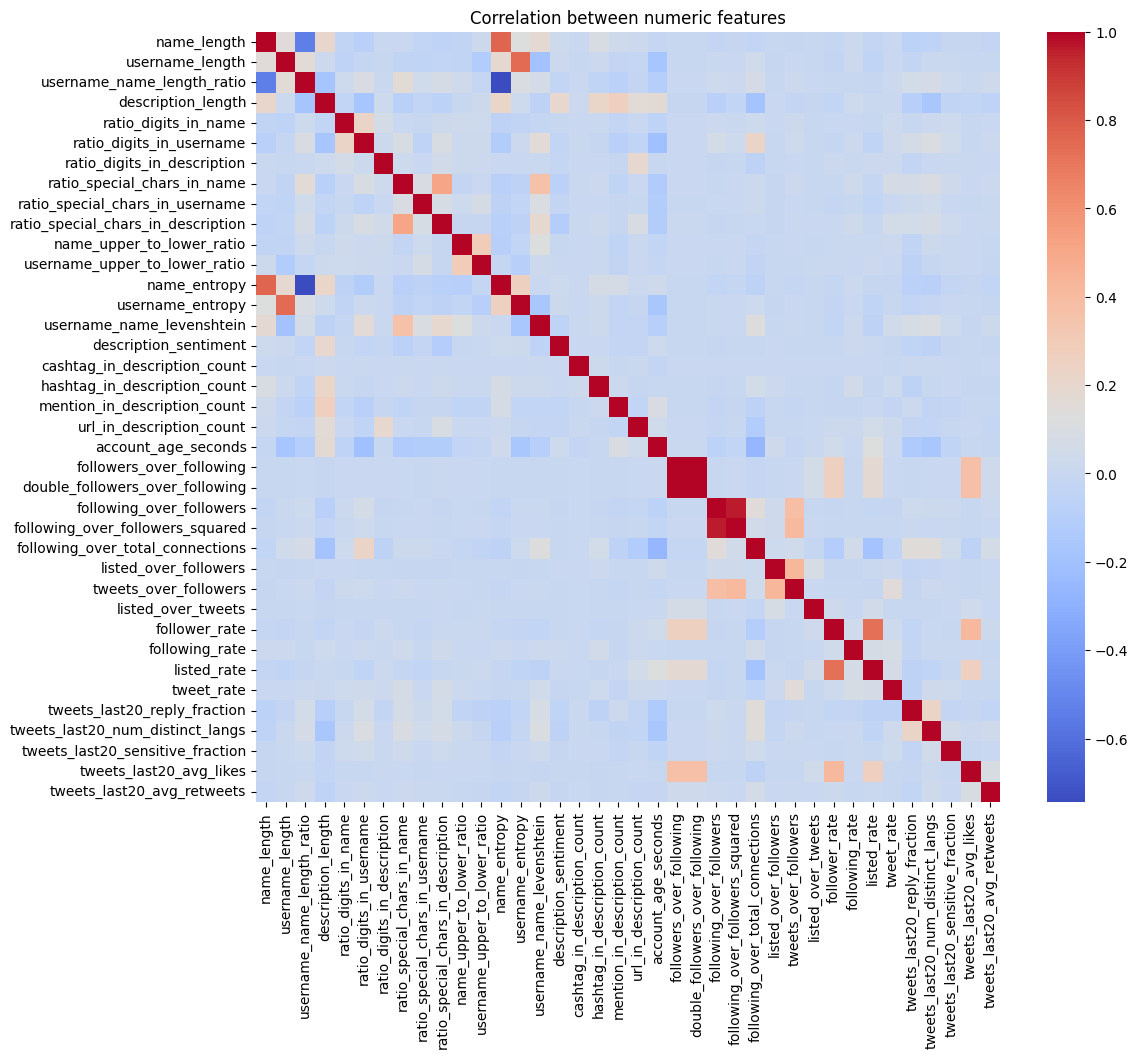

In [54]:
# Check pairwise correlations between numeric features
corr_matrix = X_train[numeric_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title("Correlation between numeric features")
plt.show()

In [55]:
threshold = 0.8
high_corr = [(col1, col2, corr_matrix.loc[col1, col2])
             for col1 in numeric_cols for col2 in numeric_cols
             if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold]

print("Highly correlated pairs (>|0.8|):")
for col1, col2, corr_val in high_corr:
    print(f"{col1} - {col2}: {corr_val:.2f}")

Highly correlated pairs (>|0.8|):
followers_over_following - double_followers_over_following: 1.00
double_followers_over_following - followers_over_following: 1.00
following_over_followers - following_over_followers_squared: 0.96
following_over_followers_squared - following_over_followers: 0.96


In [56]:
X_train = X_train.drop(columns=["double_followers_over_following", "following_over_followers_squared"])

# Apply also to validation and test sets
X_val = X_val.drop(columns=["double_followers_over_following", "following_over_followers_squared"])
X_test = X_test.drop(columns=["double_followers_over_following", "following_over_followers_squared"])

In [61]:
numeric_cols = X_train.select_dtypes(include=['float64', 'float32', 'int32', 'int64']).columns

In [62]:
variances = X_train[numeric_cols.append(bool_cols)].var()

variances.sort_values(ascending=False)

,0
account_age_seconds,17712372877227742.000000
followers_over_following,53430567048.673157
tweets_last20_avg_retweets,22185325.198682
tweets_last20_avg_likes,6904161.486436
tweets_over_followers,118010.460686
description_length,2539.468751
following_over_followers,485.206677
name_length,56.409575
listed_over_tweets,51.591146
username_length,7.290613


In [37]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("var_thresh", VarianceThreshold(threshold=0.01), num_bool_cols)  # remove features with variance < 0.01
    ],
    remainder="passthrough"
)

# Fit only on training set
preprocessor.fit(X_train)

# Transform train/val/test
X_train = preprocessor.transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [41]:
support_mask = preprocessor.named_transformers_['var_thresh'].get_support()
kept_num_bool = num_bool_cols[support_mask]

print("Kept numeric/bool features:", kept_num_bool)

Kept numeric/bool features: Index(['name_length', 'username_length', 'username_name_length_ratio',
       'description_length', 'has_description', 'has_url', 'has_location',
       'has_pinned_tweet', 'ratio_digits_in_username',
       'ratio_special_chars_in_name', 'ratio_special_chars_in_description',
       'name_upper_to_lower_ratio', 'username_upper_to_lower_ratio',
       'name_entropy', 'username_entropy', 'username_name_levenshtein',
       'description_sentiment', 'cashtag_in_description_count',
       'hashtag_in_description_count', 'mention_in_description_count',
       'url_in_description_count', 'is_verified', 'account_age_seconds',
       'followers_over_following', 'following_over_followers',
       'following_over_total_connections', 'listed_over_followers',
       'tweets_over_followers', 'listed_over_tweets',
       'tweets_last20_reply_fraction', 'tweets_last20_num_distinct_langs',
       'tweets_last20_avg_likes', 'tweets_last20_avg_retweets'],
      dtype='object')

In [42]:
len(kept_num_bool)

33